# Libraries used


In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Preprocessing

In [26]:
df = pd.read_csv("BankChurners.csv")
df.drop(df.columns[-2:], axis = 1, inplace= True)
df.drop(df.columns[0], axis =1, inplace= True)
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [27]:
#Features scaling
numeric_features = ['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
minmax_normalizer = MinMaxScaler()
df[numeric_features] = minmax_normalizer.fit_transform(df[numeric_features])

In [28]:
#Encoding target
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

#Grouping customer age
age_bins = [25, 35, 45, 55, 65, 100]
age_groups = ['25-34', '35-44', '45-55', '55-65', '65+']
df['Customer_Age_Group'] = pd.cut(df['Customer_Age'], bins=age_bins, labels=age_groups)

#Categorical encoding
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Customer_Age_Group']
#Label Encoding
label_encoder = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(label_encoder.fit_transform)

# #Onehot Encoding
# onehot_enc = OneHotEncoder()
# encoded_feature = pd.DataFrame(onehot_enc.fit_transform(df[categorical_features]))
# df_encoded = pd.concat(df, encoded_feature, axis=1)

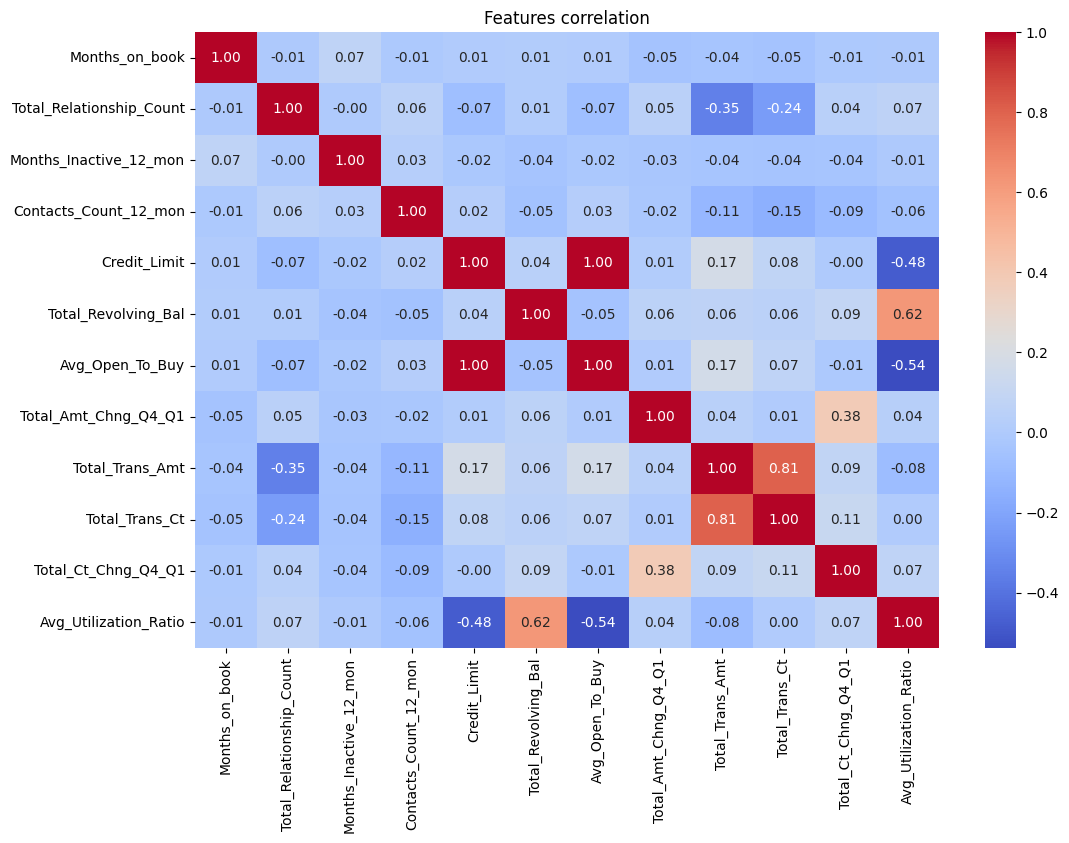

In [29]:
#Correlation matrix
features = ['Customer_Age_Group', 'Gender', 'Dependent_count',
            'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
            'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
fet = ['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
correlation_matrix = df[fet].corr()

#Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt= '.2f')
plt.title('Features correlation')
plt.show()


## Train test split

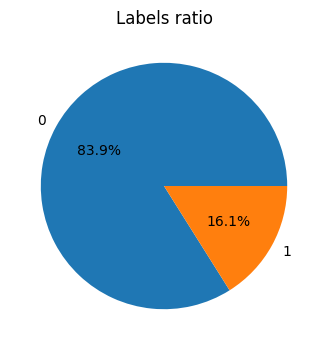

In [30]:
#Why oversampling?
labels_count = df['Attrition_Flag'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(labels_count, labels=labels_count.index, autopct= "%1.1f%%")
plt.title("Labels ratio")
plt.show()

In [31]:
#Features and labels split
selected_feature = numeric_features+categorical_features
X = df[selected_feature]
y = df['Attrition_Flag']

#Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Oversampling
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train and test model

In [32]:
classifiers = [
    LogisticRegression(random_state = 42),
    RandomForestClassifier(random_state = 42),
    SVC(random_state = 42),  
    GradientBoostingClassifier()
]

for classifier in classifiers:
    #Train model
    classifier.fit(X_train, y_train)
    #Make Prediction
    y_pred = classifier.predict(X_test)
    
    #Print result
    classifier_name = type(classifier).__name__
    print(f"{classifier_name}",
          classification_report(y_test, y_pred),
          "-----------------------------", sep="\n")

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1699
           1       0.78      0.48      0.59       327

    accuracy                           0.89      2026
   macro avg       0.84      0.73      0.76      2026
weighted avg       0.89      0.89      0.88      2026

-----------------------------


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1699
           1       0.92      0.81      0.86       327

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

-----------------------------
SVC
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1699
           1       0.86      0.35      0.50       327

    accuracy                           0.89      2026
   macro avg       0.87      0.67      0.72      2026
weighted avg       0.88      0.89      0.86      2026

-----------------------------
GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1699
           1       0.93      0.85      0.89       327

    accuracy                           0.97      2026
   macro avg  

<BarContainer object of 18 artists>

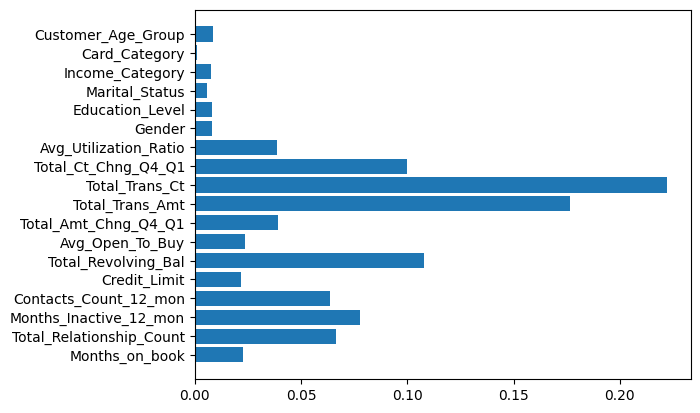

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
plt.barh(selected_feature, rf.feature_importances_)

<BarContainer object of 18 artists>

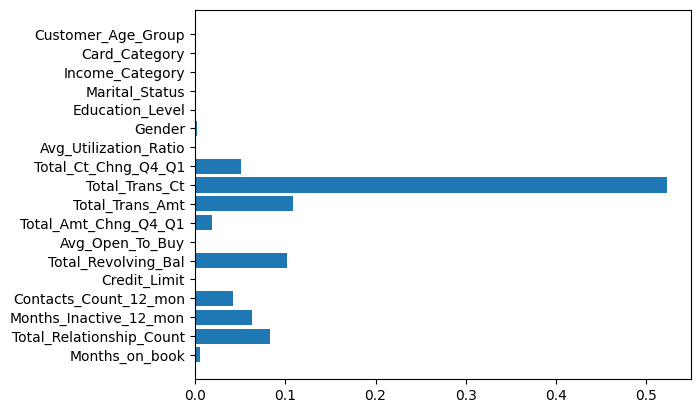

In [34]:
xg = GradientBoostingClassifier()
xg.fit(X_train_res, y_train_res)
plt.barh(selected_feature, xg.feature_importances_)